In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn import preprocessing
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
from matplotlib.pyplot import figure

In [2]:
##train_data=pd.read_csv("/Users/davidepiccoli/Desktop/data mining/project 2/ravdess_features_dm2/RavdessAudioOnlyFeatures_TRAIN.csv")
##test_data=pd.read_csv("/Users/davidepiccoli/Desktop/data mining/project 2/ravdess_features_dm2/RavdessAudioOnlyFeatures_TEST.csv")

In [3]:
train_data=pd.read_csv("C:/Users/user/Downloads/ravdess_features_dm2/RavdessAudioOnlyFeatures_TRAIN.csv")
test_data=pd.read_csv("C:/Users/user/Downloads/ravdess_features_dm2/RavdessAudioOnlyFeatures_TEST.csv")

In [4]:
print(train_data.shape, test_data.shape)

(1828, 434) (624, 434)


In [5]:
train_data.describe()

,actor,frame_count,sum,mean,std,min,max,q01,q05,q25,...,stft_max_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_q99_w4,stft_kur_w4,stft_skew_w4
count,1828.000000,1828.000000,1828.000000,1.828000e+03,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,...,1828.0,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.0,1828.000000,1828.000000
mean,9.295405,194588.269694,0.011480,2.631271e-08,0.020003,-0.163561,0.176284,-0.067207,-0.031204,-0.001011,...,1.0,0.120335,0.201699,0.456521,0.666192,0.842724,0.999818,1.0,-0.555631,-0.389952
std,5.079148,28480.301163,9.306631,4.929263e-05,0.020499,0.174879,0.193032,0.069398,0.031051,0.001624,...,0.0,0.130108,0.168295,0.167305,0.123141,0.078090,0.005041,0.0,0.776547,0.433813
min,1.000000,140941.000000,-151.120178,-9.435576e-04,0.000652,-0.998810,0.004669,-0.492982,-0.246616,-0.015625,...,1.0,0.000000,0.000000,0.000000,0.000000,0.007891,0.839625,1.0,-1.644320,-1.938627
25%,5.000000,171371.000000,-0.353432,-1.805578e-06,0.006509,-0.202370,0.053307,-0.085493,-0.040550,-0.001190,...,1.0,0.014703,0.051222,0.342588,0.609088,0.812227,1.000000,1.0,-1.007945,-0.636543
50%,9.000000,188989.000000,-0.036697,-2.047901e-07,0.013575,-0.100555,0.105606,-0.045059,-0.021912,-0.000397,...,1.0,0.070476,0.161748,0.475102,0.683680,0.855090,1.000000,1.0,-0.745296,-0.405489
75%,14.000000,214614.000000,0.199814,1.008195e-06,0.025762,-0.051682,0.219269,-0.022423,-0.010315,-0.000122,...,1.0,0.189830,0.335955,0.590281,0.747868,0.889619,1.000000,1.0,-0.316342,-0.156594
max,18.000000,304304.000000,240.889893,1.222810e-03,0.152168,-0.006134,0.999146,-0.002441,-0.000580,0.000000,...,1.0,0.645577,0.726413,0.834716,0.930228,0.986704,1.000000,1.0,7.127631,2.880807


In [6]:
train_data.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename,frame_count,...,stft_max_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_q99_w4,stft_kur_w4,stft_skew_w4
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,1,M,03-01-01-01-01-01-01.wav,158558,...,1.0,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,1.0,6.742190,-1.706215
1,audio-only,speech,neutral,normal,Kids are talking by the door,2nd,1,M,03-01-01-01-01-02-01.wav,160160,...,1.0,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,1.0,-0.700420,-0.201495
2,audio-only,speech,neutral,normal,Dogs are sitting by the door,1st,1,M,03-01-01-01-02-01-01.wav,156956,...,1.0,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.0,1.688986,-1.024773
3,audio-only,speech,neutral,normal,Dogs are sitting by the door,2nd,1,M,03-01-01-01-02-02-01.wav,152152,...,1.0,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,1.0,-0.594111,-0.412871
4,audio-only,speech,calm,normal,Kids are talking by the door,1st,1,M,03-01-02-01-01-01-01.wav,169769,...,1.0,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,1.0,0.126535,-0.620782


In [7]:
train_data.isnull().sum()

modality               0
vocal_channel          0
emotion                0
emotional_intensity    0
statement              0
                      ..
stft_q75_w4            0
stft_q95_w4            0
stft_q99_w4            0
stft_kur_w4            0
stft_skew_w4           0
Length: 434, dtype: int64

# we decided to drop every column where there was only 1 value for all the row, resulting in a shrink from 434 to 382

In [8]:
len(train_data["vocal_channel"].unique())

2

In [9]:
for column in train_data.columns:
    if len(train_data[column].unique())==1:
        print(column,train_data[column].unique(), end="\n\n")
        train_data.drop(column,axis=1,inplace=True)

modality ['audio-only']

lag1_q50 [0.]

zc_min [0]

zc_max [1]

zc_q01 [0.]

zc_q05 [0.]

zc_q25 [0.]

zc_q50 [0.]

zc_q75 [0.]

zc_q99 [1.]

stft_max [1.]

stft_q95 [1.]

stft_q99 [1.]

lag1_q50_w1 [0.]

zc_min_w1 [0]

zc_max_w1 [1]

zc_q01_w1 [0.]

zc_q05_w1 [0.]

zc_q25_w1 [0.]

zc_q50_w1 [0.]

zc_q75_w1 [0.]

zc_min_w2 [0]

zc_max_w2 [1]

zc_q01_w2 [0.]

zc_q05_w2 [0.]

zc_q25_w2 [0.]

zc_q50_w2 [0.]

zc_q75_w2 [0.]

zc_q99_w2 [1.]

stft_max_w2 [1.]

stft_q95_w2 [1.]

stft_q99_w2 [1.]

zc_min_w3 [0]

zc_max_w3 [1]

zc_q01_w3 [0.]

zc_q05_w3 [0.]

zc_q25_w3 [0.]

zc_q50_w3 [0.]

zc_q75_w3 [0.]

zc_q99_w3 [1.]

stft_max_w3 [1.]

stft_q95_w3 [1.]

stft_q99_w3 [1.]

lag1_q50_w4 [0.]

zc_min_w4 [0]

zc_max_w4 [1]

zc_q01_w4 [0.]

zc_q05_w4 [0.]

zc_q25_w4 [0.]

zc_q50_w4 [0.]

stft_max_w4 [1.]

stft_q99_w4 [1.]



In [10]:
train_data.shape

(1828, 382)

# actor n°18 has only 60 rows, while every other actors, both on test and train have 104

<AxesSubplot:>

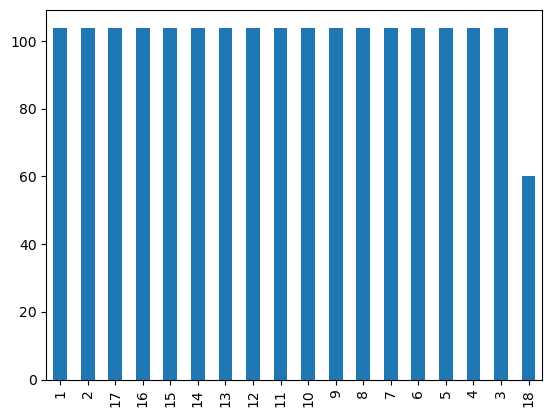

In [11]:
train_data["actor"].value_counts().plot(kind='bar')
#test_data["actor"].value_counts().plot(kind='bar')

In [12]:
train_num=train_data.loc[:, train_data.dtypes != object]
print(train_num.shape)

(1828, 375)


In [13]:
l=[]
for i in train_num.columns:
    if i == "length_w1":
        
        break
    print(i)
    l.append(i)
print(l)   

actor
frame_count
sum
mean
std
min
max
q01
q05
q25
q50
q75
q95
q99
kur
skew
lag1_sum
lag1_mean
lag1_std
lag1_min
lag1_max
lag1_q01
lag1_q05
lag1_q25
lag1_q75
lag1_q95
lag1_q99
lag1_kur
lag1_skew
zc_sum
zc_mean
zc_std
zc_q95
zc_kur
zc_skew
mfcc_sum
mfcc_mean
mfcc_std
mfcc_min
mfcc_max
mfcc_q01
mfcc_q05
mfcc_q25
mfcc_q50
mfcc_q75
mfcc_q95
mfcc_q99
mfcc_kur
mfcc_skew
sc_sum
sc_mean
sc_std
sc_min
sc_max
sc_q01
sc_q05
sc_q25
sc_q50
sc_q75
sc_q95
sc_q99
sc_kur
sc_skew
stft_sum
stft_mean
stft_std
stft_min
stft_q01
stft_q05
stft_q25
stft_q50
stft_q75
stft_kur
stft_skew
['actor', 'frame_count', 'sum', 'mean', 'std', 'min', 'max', 'q01', 'q05', 'q25', 'q50', 'q75', 'q95', 'q99', 'kur', 'skew', 'lag1_sum', 'lag1_mean', 'lag1_std', 'lag1_min', 'lag1_max', 'lag1_q01', 'lag1_q05', 'lag1_q25', 'lag1_q75', 'lag1_q95', 'lag1_q99', 'lag1_kur', 'lag1_skew', 'zc_sum', 'zc_mean', 'zc_std', 'zc_q95', 'zc_kur', 'zc_skew', 'mfcc_sum', 'mfcc_mean', 'mfcc_std', 'mfcc_min', 'mfcc_max', 'mfcc_q01', 'mfcc_q05', 'm

In [14]:
train_without_time_series=train_num.loc[:,['actor', 'frame_count', 'sum', 'mean', 'std', 'min', 'max', 'kur', 'skew', 'zc_sum',
                         'zc_mean', 'zc_std', 'zc_kur', 'zc_skew', 'mfcc_sum', 'mfcc_mean', 'mfcc_std', 'mfcc_min',
                         'mfcc_max', 'mfcc_kur', 'mfcc_skew', 'sc_sum', 'sc_mean', 'sc_std', 'sc_min', 'sc_max', 'sc_kur',
                         'sc_skew', 'stft_sum', 'stft_mean', 'stft_std', 'stft_min', 'stft_kur', 'stft_skew']]


<AxesSubplot:>

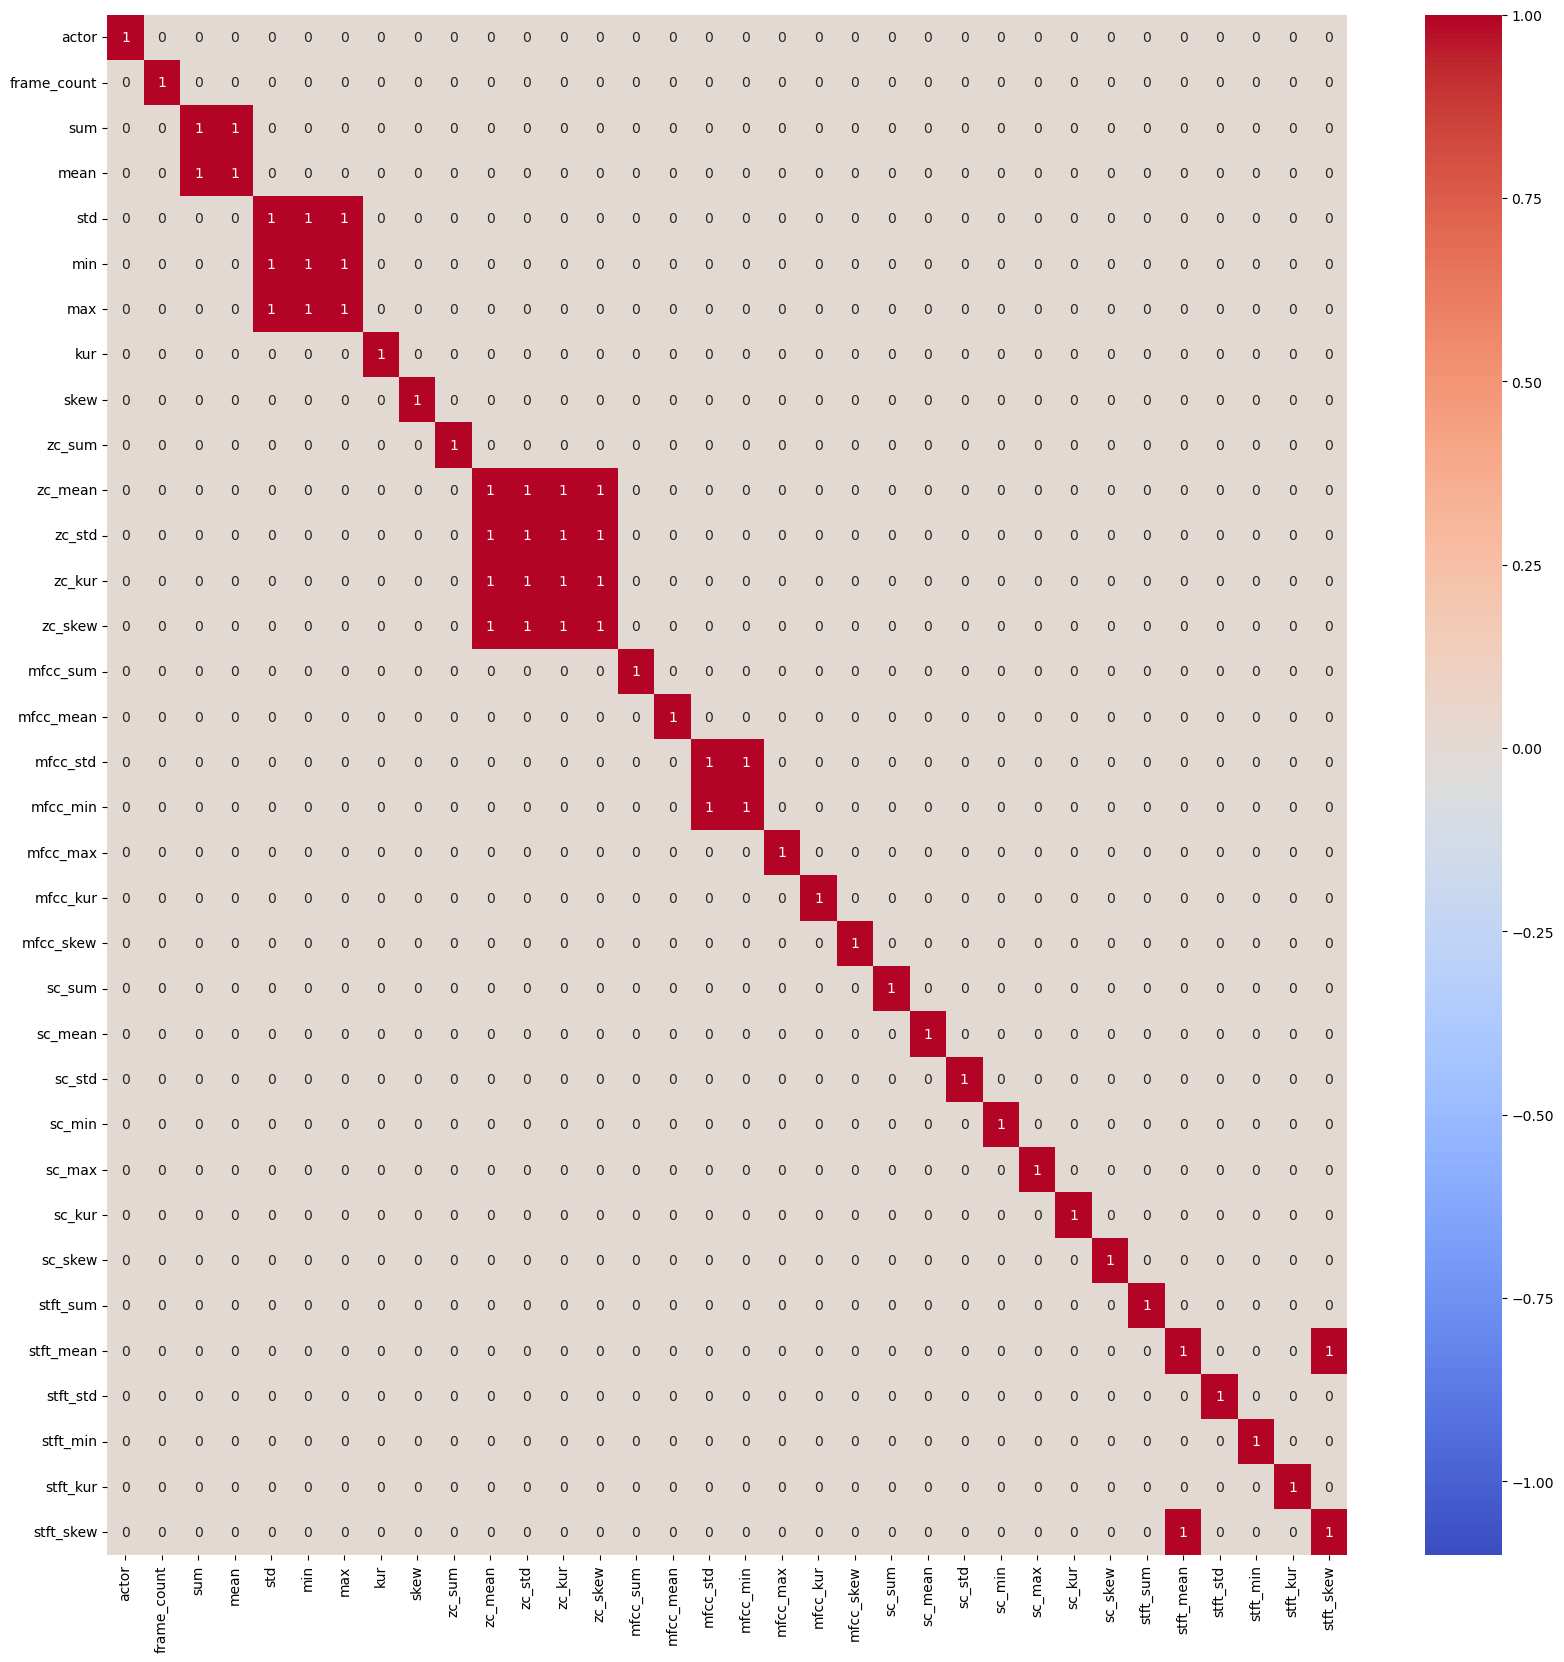

In [15]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(abs(train_without_time_series.corr(method='pearson'))>=0.9, vmin=1, vmax=-1, cmap="coolwarm", annot=True  )

In [16]:
train_data.drop(['stft_skew', 'mfcc_min', 'zc_mean', 'zc_kur', 'zc_skew', 'min', 'max', "sc_sum", "filename" ],axis=1,inplace=True)

In [17]:
train_num=train_data.loc[:, train_data.dtypes != object]
train_cat=train_data.loc[:, train_data.dtypes == object]
train_cat.drop(["emotion"],axis=1,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_12344\1150695506.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cat.drop(["emotion"],axis=1,inplace=True)


In [18]:
print(train_cat.columns)

Index(['vocal_channel', 'emotional_intensity', 'statement', 'repetition',
       'sex'],
      dtype='object')


In [19]:
frames=[train_num,train_cat]
train_final=pd.concat(frames,axis=1)

In [20]:
train_final.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 372 columns):
 #    Column               Dtype  
---   ------               -----  
 0    actor                int64  
 1    frame_count          int64  
 2    sum                  float64
 3    mean                 float64
 4    std                  float64
 5    q01                  float64
 6    q05                  float64
 7    q25                  float64
 8    q50                  float64
 9    q75                  float64
 10   q95                  float64
 11   q99                  float64
 12   kur                  float64
 13   skew                 float64
 14   lag1_sum             float64
 15   lag1_mean            float64
 16   lag1_std             float64
 17   lag1_min             float64
 18   lag1_max             float64
 19   lag1_q01             float64
 20   lag1_q05             float64
 21   lag1_q25             float64
 22   lag1_q75             float64
 23   lag1_q95   

## dimensionality reduction

In [21]:
y = np.array(train_data['emotion'])

In [22]:
le = preprocessing.LabelEncoder()
for column_name in train_final.columns:
    if train_final[column_name].dtype == object:
        train_final[column_name] = le.fit_transform(train_final[column_name])
    else:
        pass

In [23]:
X_train, X_test, y_train, y_test = train_test_split(train_num, y, test_size=0.3, 
                                                    random_state=100, stratify=y)

In [24]:
X_train.shape

(1279, 367)

In [25]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.37158469945355194
F1-score [0.48167539 0.49411765 0.2247191  0.28395062 0.33707865 0.42857143
 0.30872483 0.32      ]
              precision    recall  f1-score   support

       angry      0.430     0.548     0.482        84
        calm      0.488     0.500     0.494        84
     disgust      0.222     0.227     0.225        44
     fearful      0.295     0.274     0.284        84
       happy      0.319     0.357     0.337        84
     neutral      0.429     0.429     0.429        42
         sad      0.354     0.274     0.309        84
   surprised      0.375     0.279     0.320        43

    accuracy                          0.372       549
   macro avg      0.364     0.361     0.360       549
weighted avg      0.369     0.372     0.367       549



(array([7., 0., 0., 1., 4., 1., 1., 0., 0., 2.]),
 array([2.31055954e-17, 4.04163506e-10, 8.08326989e-10, 1.21249047e-09,
        1.61665395e-09, 2.02081744e-09, 2.42498092e-09, 2.82914440e-09,
        3.23330789e-09, 3.63747137e-09, 4.04163485e-09]),
 <BarContainer object of 10 artists>)

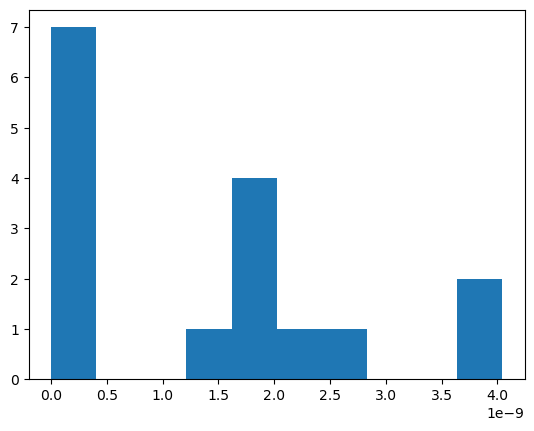

In [26]:
plt.hist((np.var(X_train, axis=0))[np.var(X_train, axis=0 ) < 9.37927341e-09  ])
#print(np.var(train_good_norm, axis=0)[np.var(train_good_norm, axis=0) > 4.32296153e+09 ])
#plt.yscale('log')
#plt.show()

In [27]:
pd.set_option('display.max_rows', 500)
print(np.var(X_train["frame_count"], axis=0))


806761498.0036353


## find a good threshold such that the accuracy is optimized here

In [28]:
#plt.hist(np.var(X_train, axis=0)[np.var(X_train, axis=0 ) < 900000  ])
#plt.yscale('log')
#plt.show()
#list(np.var(X_train, axis=0)[np.var(X_train, axis=0) > 200000])



In [29]:
sel = VarianceThreshold(threshold=9.37927341e-09)
X_train_sel = sel.fit_transform(X_train)

X_train_sel.shape

(1279, 351)

In [30]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.366120218579235
F1-score [0.46486486 0.46783626 0.20689655 0.31446541 0.35602094 0.39506173
 0.30872483 0.29333333]
              precision    recall  f1-score   support

       angry      0.426     0.512     0.465        84
        calm      0.460     0.476     0.468        84
     disgust      0.209     0.205     0.207        44
     fearful      0.333     0.298     0.314        84
       happy      0.318     0.405     0.356        84
     neutral      0.410     0.381     0.395        42
         sad      0.354     0.274     0.309        84
   surprised      0.344     0.256     0.293        43

    accuracy                          0.366       549
   macro avg      0.357     0.351     0.351       549
weighted avg      0.364     0.366     0.362       549



Accuracy 0.37158469945355194
Accuracy 0.40255009107468126
Accuracy 0.40255009107468126
Accuracy 0.40255009107468126
Accuracy 0.41894353369763204
Accuracy 0.42987249544626593
Accuracy 0.42987249544626593
Accuracy 0.424408014571949
Accuracy 0.4207650273224044
Accuracy 0.4116575591985428
Accuracy 0.41894353369763204


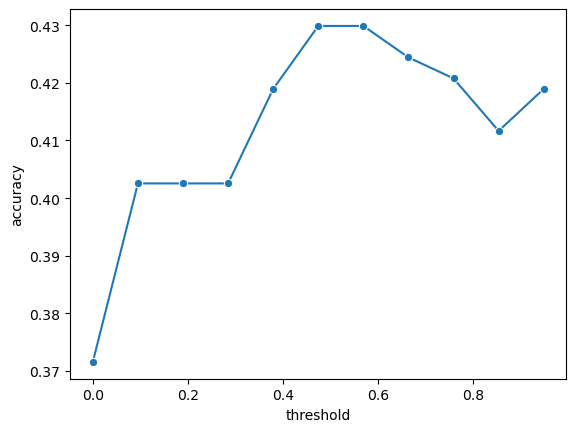

In [31]:
list_of_thresholds=[2.31055954e-17, 9.48409190e-02, 1.89681838e-01, 2.84522757e-01,
        3.79363676e-01, 4.74204595e-01, 5.69045514e-01, 6.63886433e-01,
        7.58727352e-01, 8.53568271e-01, 9.48409190e-01]

accuracy_scores=[]

for threshold in list_of_thresholds:
    sel = VarianceThreshold(threshold=threshold)
    X_train_sel = sel.fit_transform(X_train)
    X_test_sel = sel.transform(X_test)

    clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
    clf.fit(X_train_sel, y_train)

    y_pred = clf.predict(X_test_sel)
    
    print('Accuracy %s' % accuracy_score(y_test, y_pred))
    
    z=accuracy_score(y_test, y_pred)
    
    accuracy_scores.append(z)
    
sns.lineplot(x=list_of_thresholds, y=accuracy_scores, marker='o')
plt.ylabel('accuracy')
plt.xlabel('threshold')
plt.show()
    
    

In [32]:
def my_arange(start, end, step):
    return np.linspace(start, end, num=round((end-start)/step), endpoint=False)

Accuracy 0.37158469945355194
Accuracy 0.3697632058287796
Accuracy 0.3551912568306011
Accuracy 0.37522768670309653
Accuracy 0.37340619307832423
Accuracy 0.3679417122040073
Accuracy 0.3770491803278688


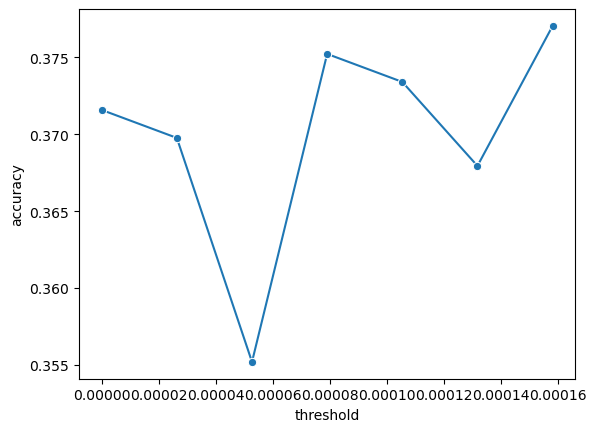

In [33]:
thresholds=[]

accuracy_scores=[]

for threshold in my_arange(0, 1.84582041e-04, 10e-05/4):
    sel = VarianceThreshold(threshold=threshold)
    X_train_sel = sel.fit_transform(X_train)
    X_test_sel = sel.transform(X_test)

    clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
    clf.fit(X_train_sel, y_train)

    y_pred = clf.predict(X_test_sel)
    
    print('Accuracy %s' % accuracy_score(y_test, y_pred))
    
    z=accuracy_score(y_test, y_pred)
    
    accuracy_scores.append(z)
    thresholds.append(threshold)
    
sns.lineplot(x=thresholds, y=accuracy_scores, marker='o')
plt.ylabel('accuracy')
plt.xlabel('threshold')
plt.show()

## PCA

In [34]:
print((train_final.loc[:, train_final.dtypes == object]).columns)

Index([], dtype='object')


In [35]:
import pandas

scaler = MinMaxScaler()
train_final_norm = scaler.fit_transform(train_final)
train_final_norm=pd.DataFrame(train_final_norm, columns=train_final.columns)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(train_final_norm, y, test_size=0.3, 
                                                    random_state=100, stratify=y)

In [37]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [38]:
X_train_pca.shape

(1279, 2)

In [39]:
y_train_ohe=le.fit_transform(y_train)

In [40]:
print(y_train_ohe)

[0 3 1 ... 6 6 1]


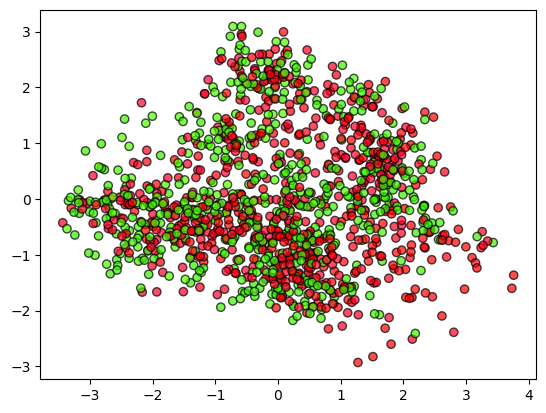

In [41]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_ohe, 
            cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [42]:
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.17486338797814208
F1-score [0.30434783 0.13186813 0.12345679 0.16969697 0.1871345  0.08955224
 0.12790698 0.18421053]
              precision    recall  f1-score   support

       angry       0.28      0.33      0.30        84
        calm       0.12      0.14      0.13        84
     disgust       0.14      0.11      0.12        44
     fearful       0.17      0.17      0.17        84
       happy       0.18      0.19      0.19        84
     neutral       0.12      0.07      0.09        42
         sad       0.12      0.13      0.13        84
   surprised       0.21      0.16      0.18        43

    accuracy                           0.17       549
   macro avg       0.17      0.16      0.16       549
weighted avg       0.17      0.17      0.17       549



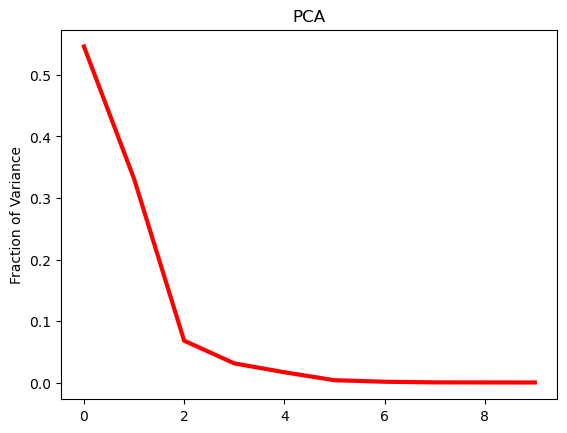

In [43]:
plt.plot(PCA(n_components=10).fit(train_final).explained_variance_ratio_, lw=3, color='r', ms=2)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.show()

In [44]:
pca = PCA(n_components=3)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [45]:
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.2659380692167577
F1-score [0.42328042 0.32954545 0.20689655 0.23312883 0.17391304 0.19277108
 0.20512821 0.26506024]
              precision    recall  f1-score   support

       angry       0.38      0.48      0.42        84
        calm       0.32      0.35      0.33        84
     disgust       0.21      0.20      0.21        44
     fearful       0.24      0.23      0.23        84
       happy       0.18      0.17      0.17        84
     neutral       0.20      0.19      0.19        42
         sad       0.22      0.19      0.21        84
   surprised       0.28      0.26      0.27        43

    accuracy                           0.27       549
   macro avg       0.25      0.26      0.25       549
weighted avg       0.26      0.27      0.26       549



<Figure size 640x480 with 0 Axes>

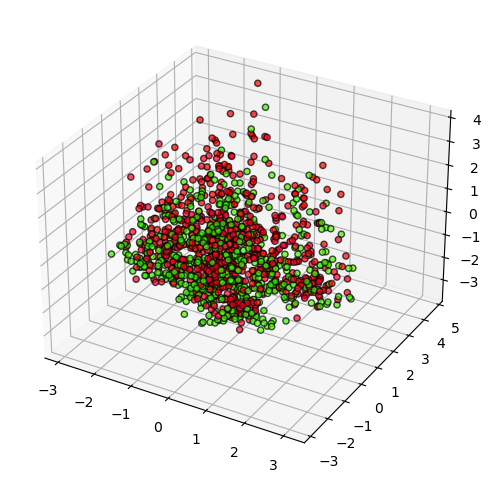

In [46]:
fig = plt.figure()
figure(figsize=(8, 6))
ax = plt.axes(projection='3d')

zdata = X_train_pca[:, 0]
xdata = X_train_pca[:, 1]
ydata = X_train_pca[:, 2]
ax.scatter3D(xdata, ydata, zdata, c=y_train_ohe, cmap=plt.cm.prism, edgecolor='k', alpha=0.7);

# Inbalanced Learning

In [47]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from scikitplot.metrics import plot_roc
from sklearn.metrics import roc_curve, auc, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from collections import Counter

In [48]:
np.unique(y, return_counts=True)

(array(['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad',
        'surprised'], dtype=object),
 array([280, 280, 144, 280, 280, 140, 280, 144], dtype=int64))

In [49]:
## angry 280
## calm 280
## disgust 144
## fearful 280
## happy 280
## neutral 140
## sad 280
## surprised 144

In [50]:
np.unique(y_train, return_counts=True)

(array(['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad',
        'surprised'], dtype=object),
 array([196, 196, 100, 196, 196,  98, 196, 101], dtype=int64))

In [51]:
np.unique(y_test, return_counts=True)

(array(['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad',
        'surprised'], dtype=object),
 array([84, 84, 44, 84, 84, 42, 84, 43], dtype=int64))

In [52]:
X = pd.concat([X_train, X_test])
y = np.concatenate([y_train, y_test])

In [53]:
angry_rows = [i for i in range(len(y)) if y[i] == 'angry']
calm_rows = [i for i in range(len(y)) if y[i] == 'calm']
disgust_rows = [i for i in range(len(y)) if y[i] == 'disgust']
fearful_rows = [i for i in range(len(y)) if y[i] == 'fearful']
happy_rows = [i for i in range(len(y)) if y[i] == 'happy']
neutral_rows = [i for i in range(len(y)) if y[i] == 'neutral']
sad_rows = [i for i in range(len(y)) if y[i] == 'sad']
surprised_rows = [i for i in range(len(y)) if y[i] == 'surprised']

In [54]:
rows2remove = np.random.choice(angry_rows, 280 - 15, replace=False)
y2 = np.array([y[i] for i in range(len(y)) if i not in rows2remove])
X2 = X.drop(index=rows2remove, axis=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, 
                                                    random_state=100, stratify=y2)

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X2_train, y2_train)

y2_pred0 = clf.predict(X2_test)

print('Accuracy %s' % accuracy_score(y2_test, y2_pred0))
print('F1-score %s' % f1_score(y2_test, y2_pred0, average=None))
print(classification_report(y2_test, y2_pred0))

Accuracy 0.16417910447761194
F1-score [0.14285714 0.17679558 0.02597403 0.1878453  0.21965318 0.1038961
 0.20731707 0.05633803]
              precision    recall  f1-score   support

       angry       0.11      0.20      0.14         5
        calm       0.16      0.19      0.18        84
     disgust       0.03      0.02      0.03        43
     fearful       0.18      0.20      0.19        84
       happy       0.21      0.23      0.22        84
     neutral       0.11      0.10      0.10        42
         sad       0.21      0.20      0.21        84
   surprised       0.07      0.05      0.06        43

    accuracy                           0.16       469
   macro avg       0.14      0.15      0.14       469
weighted avg       0.16      0.16      0.16       469



In [57]:
from scikitplot.metrics import plot_roc
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [58]:
y2_score = clf.predict_proba(X2_test)
fpr0, tpr0, _ = roc_curve(y2_test, y2_score[:, 1],pos_label='test')
roc_auc0 = auc(fpr0, tpr0)

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1018: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


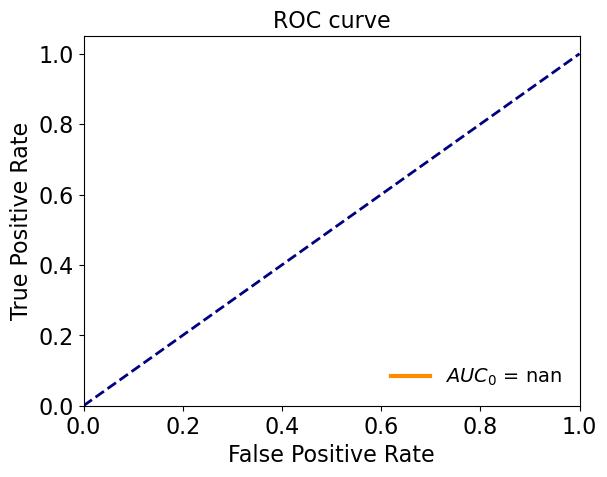

In [59]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

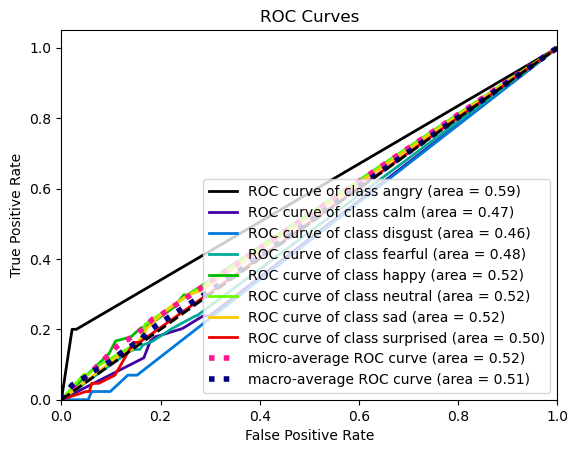

In [60]:
y2_score = clf.predict_proba(X2_test)
plot_roc(y2_test, y2_score)
plt.show()

In [61]:
encoder = {'angry':1, 'calm':2, 'disgust':3, 'fearful':4, 'happy':5, 'neutral':6, 'sad':7, 'surprised':8}

# Undersampling

### Random Under Sampler

In [62]:
rus = RandomUnderSampler(random_state=42)
X2_res, y2_res = rus.fit_resample(X2_train, y2_train)
print('Resampled dataset shape %s' % Counter(y2_res))

Resampled dataset shape Counter({'angry': 10, 'calm': 10, 'disgust': 10, 'fearful': 10, 'happy': 10, 'neutral': 10, 'sad': 10, 'surprised': 10})


In [63]:
y2_res

array(['angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry',
       'angry', 'angry', 'angry', 'calm', 'calm', 'calm', 'calm', 'calm',
       'calm', 'calm', 'calm', 'calm', 'calm', 'disgust', 'disgust',
       'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust',
       'disgust', 'disgust', 'fearful', 'fearful', 'fearful', 'fearful',
       'fearful', 'fearful', 'fearful', 'fearful', 'fearful', 'fearful',
       'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy',
       'happy', 'happy', 'happy', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad',
       'sad', 'sad', 'surprised', 'surprised', 'surprised', 'surprised',
       'surprised', 'surprised', 'surprised', 'surprised', 'surprised',
       'surprised'], dtype='<U9')

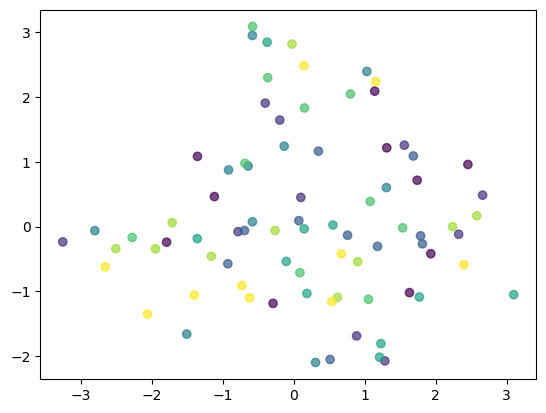

In [64]:
pca = PCA(n_components=2)
pca.fit(X_train)
X2_pca = pca.transform(X2_res)

plt.scatter(X2_pca[:, 0], X2_pca[:, 1], c=pd.DataFrame(y2_res).replace(encoder), alpha=0.7)
plt.show()

Accuracy 0.13646055437100213
F1-score [0.0212766  0.18666667 0.06976744 0.13793103 0.20253165 0.05882353
 0.23255814 0.0776699 ]
              precision    recall  f1-score   support

       angry       0.01      0.20      0.02         5
        calm       0.21      0.17      0.19        84
     disgust       0.07      0.07      0.07        43
     fearful       0.25      0.10      0.14        84
       happy       0.22      0.19      0.20        84
     neutral       0.05      0.07      0.06        42
         sad       0.33      0.18      0.23        84
   surprised       0.07      0.09      0.08        43

    accuracy                           0.14       469
   macro avg       0.15      0.13      0.12       469
weighted avg       0.20      0.14      0.16       469



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1018: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


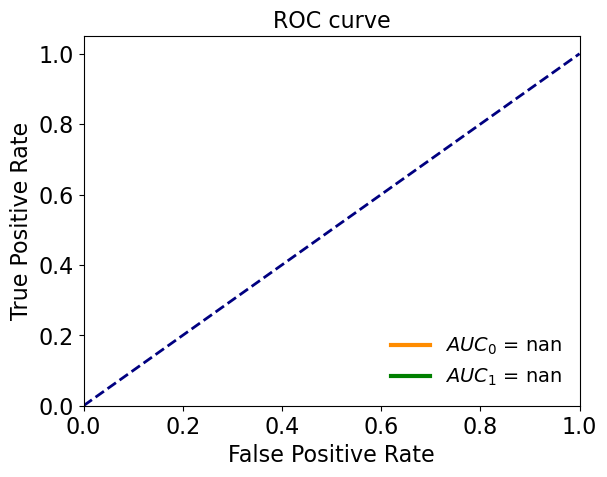

In [65]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X2_res, y2_res)

y2_pred = clf.predict(X2_test)

print('Accuracy %s' % accuracy_score(y2_test, y2_pred))
print('F1-score %s' % f1_score(y2_test, y2_pred, average=None))
print(classification_report(y2_test, y2_pred))

y2_score = clf.predict_proba(X2_test)
fpr, tpr, _ = roc_curve(y2_test, y2_score[:, 1],pos_label='test')
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

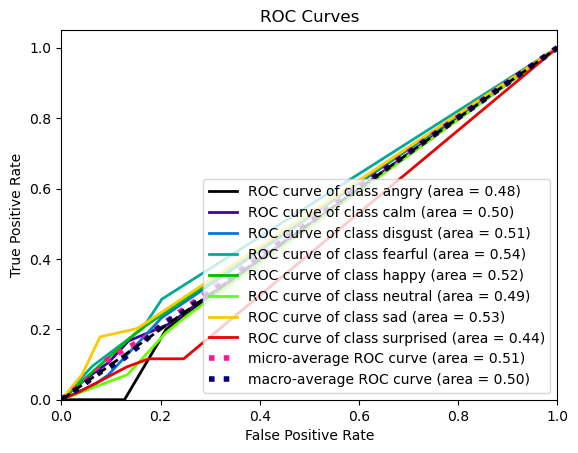

In [66]:
y2_score = clf.predict_proba(X2_test)
plot_roc(y2_test, y2_score)
plt.show()

### Condensed Nearest Neighbor

In [67]:
import warnings
warnings.simplefilter("ignore")

In [68]:
cnn = CondensedNearestNeighbour(random_state=42, n_jobs=10)
X2_res, y2_res = cnn.fit_resample(X2_train, y2_train)
print('Resampled dataset shape %s' % Counter(y2_res))

Resampled dataset shape Counter({'happy': 42, 'fearful': 40, 'sad': 40, 'calm': 39, 'surprised': 33, 'disgust': 32, 'neutral': 29, 'angry': 10})


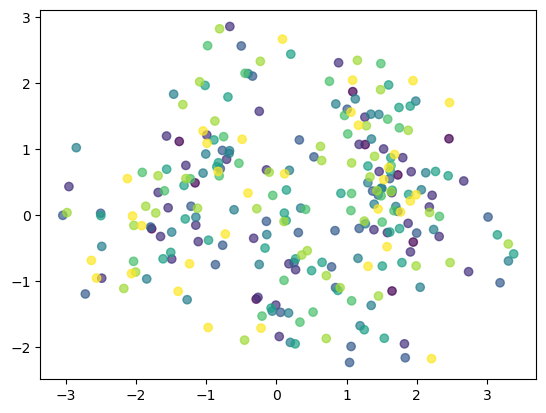

In [69]:
pca = PCA(n_components=2)
pca.fit(X2_train)
X2_pca = pca.transform(X2_res)

plt.scatter(X2_pca[:, 0], X2_pca[:, 1], c=pd.DataFrame(y2_res).replace(encoder), alpha=0.7)
plt.show()

Accuracy 0.1535181236673774
F1-score [0.06060606 0.20253165 0.07228916 0.19565217 0.21686747 0.
 0.17218543 0.06741573]
              precision    recall  f1-score   support

       angry       0.04      0.20      0.06         5
        calm       0.22      0.19      0.20        84
     disgust       0.07      0.07      0.07        43
     fearful       0.18      0.21      0.20        84
       happy       0.22      0.21      0.22        84
     neutral       0.00      0.00      0.00        42
         sad       0.19      0.15      0.17        84
   surprised       0.07      0.07      0.07        43

    accuracy                           0.15       469
   macro avg       0.12      0.14      0.12       469
weighted avg       0.16      0.15      0.15       469



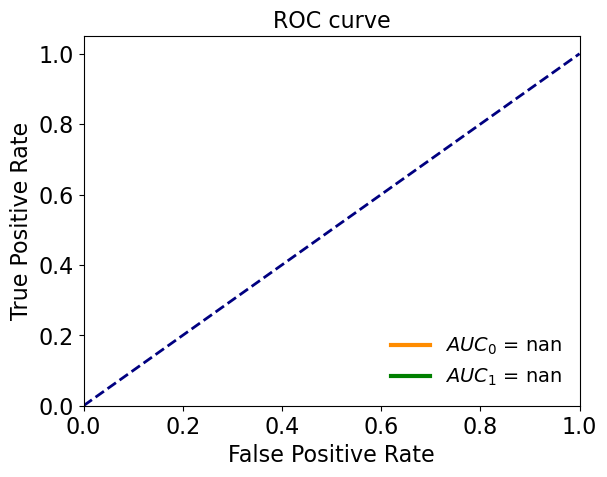

In [70]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X2_res, y2_res)

y2_pred = clf.predict(X2_test)

print('Accuracy %s' % accuracy_score(y2_test, y2_pred))
print('F1-score %s' % f1_score(y2_test, y2_pred, average=None))
print(classification_report(y2_test, y2_pred))

y2_score = clf.predict_proba(X2_test)
fpr, tpr, _ = roc_curve(y2_test, y2_score[:, 1],pos_label='test')
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

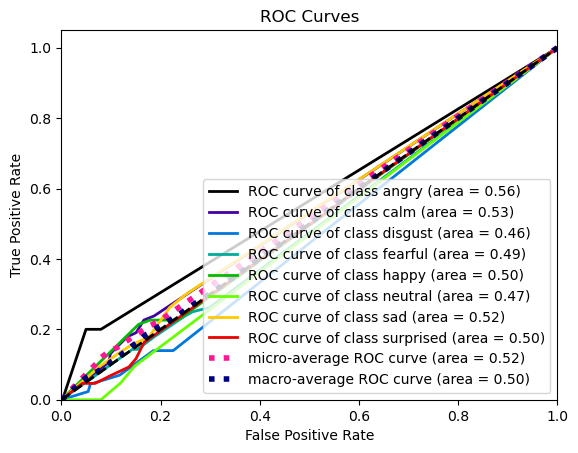

In [71]:
y2_score = clf.predict_proba(X2_test)
plot_roc(y2_test, y2_score)
plt.show()

### Tomek Links

In [72]:
tl = TomekLinks()
X2_res, y2_res = tl.fit_resample(X2_train, y2_train)
print('Resampled dataset shape %s' % Counter(y2_res))

Resampled dataset shape Counter({'calm': 133, 'happy': 131, 'sad': 128, 'fearful': 121, 'disgust': 72, 'surprised': 66, 'neutral': 60, 'angry': 10})


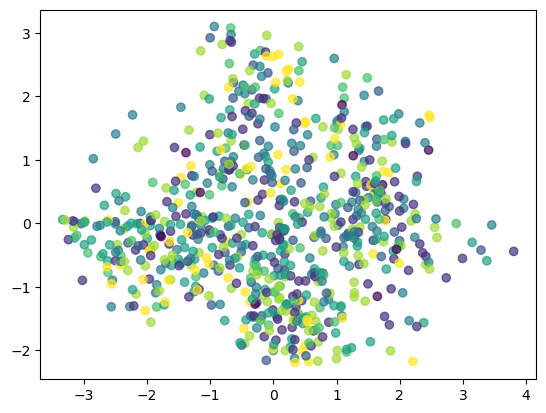

In [73]:
pca = PCA(n_components=2)
pca.fit(X2_train)
X2_pca = pca.transform(X2_res)

plt.scatter(X2_pca[:, 0], X2_pca[:, 1], c=pd.DataFrame(y2_res).replace(encoder), alpha=0.7)
plt.show()

Accuracy 0.18550106609808104
F1-score [0.23529412 0.24175824 0.08421053 0.18072289 0.1863354  0.09876543
 0.27218935 0.05970149]
              precision    recall  f1-score   support

       angry       0.17      0.40      0.24         5
        calm       0.22      0.26      0.24        84
     disgust       0.08      0.09      0.08        43
     fearful       0.18      0.18      0.18        84
       happy       0.19      0.18      0.19        84
     neutral       0.10      0.10      0.10        42
         sad       0.27      0.27      0.27        84
   surprised       0.08      0.05      0.06        43

    accuracy                           0.19       469
   macro avg       0.16      0.19      0.17       469
weighted avg       0.18      0.19      0.18       469



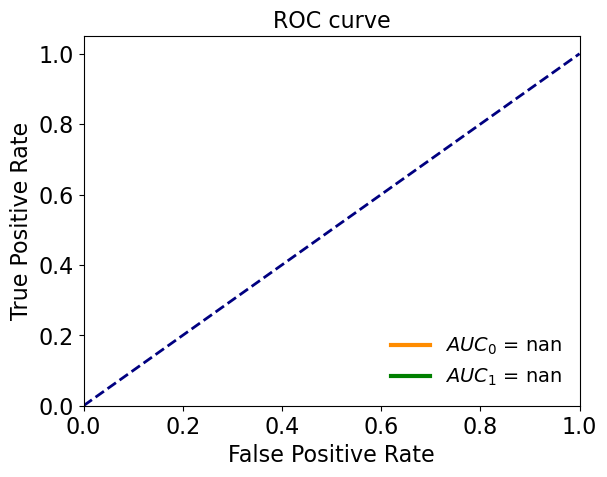

In [74]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X2_res, y2_res)

y2_pred = clf.predict(X2_test)

print('Accuracy %s' % accuracy_score(y2_test, y2_pred))
print('F1-score %s' % f1_score(y2_test, y2_pred, average=None))
print(classification_report(y2_test, y2_pred))

y2_score = clf.predict_proba(X2_test)
fpr, tpr, _ = roc_curve(y2_test, y2_score[:, 1],pos_label='test')
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

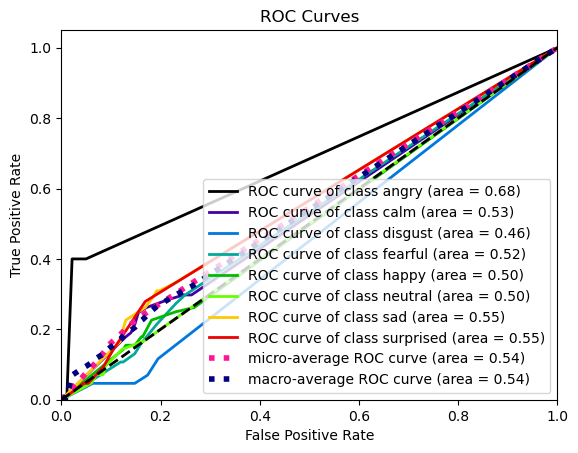

In [75]:
y2_score = clf.predict_proba(X2_test)
plot_roc(y2_test, y2_score)
plt.show()

### Edited Nearest Neighbor

In [76]:
enn = EditedNearestNeighbours()
X2_res, y2_res = enn.fit_resample(X2_train, y2_train)
print('Resampled dataset shape %s' % Counter(y2_res))

Resampled dataset shape Counter({'angry': 10, 'sad': 5, 'happy': 1})


In [77]:
pca = PCA(n_components=2)
pca.fit(X_train)
X2_pca = pca.transform(X_res)

plt.scatter(X2_pca[:, 0], X2_pca[:, 1], c=pd.DataFrame(y2_res).replace(encoder), alpha=0.7)
plt.show()

NameError: name 'X_res' is not defined

In [ ]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X2_res, y2_res)

y2_pred = clf.predict(X2_test)

print('Accuracy %s' % accuracy_score(y2_test, y2_pred))
print('F1-score %s' % f1_score(y2_test, y2_pred, average=None))
print(classification_report(y2_test, y2_pred))

y2_score = clf.predict_proba(X2_test)
fpr, tpr, _ = roc_curve(y2_test, y2_score[:, 1],pos_label='test')
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
y2_score = clf.predict_proba(X2_test)
plot_roc(y2_test, y2_score)
plt.show()

### Cluster Centroids

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids

In [ ]:
cc = ClusterCentroids(
    estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42
)
X2_res, y2_res = cc.fit_resample(X2, y2)
print('Resampled dataset shape %s' % Counter(y2_res))

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train)
X2_pca = pca.transform(X_res)

plt.scatter(X2_pca[:, 0], X2_pca[:, 1], c=pd.DataFrame(y2_res).replace(encoder), alpha=0.7)
plt.show()

In [ ]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X2_res, y2_res)

y2_pred = clf.predict(X2_test)

print('Accuracy %s' % accuracy_score(y2_test, y2_pred))
print('F1-score %s' % f1_score(y2_test, y2_pred, average=None))
print(classification_report(y2_test, y2_pred))

y2_score = clf.predict_proba(X2_test)
fpr, tpr, _ = roc_curve(y2_test, y2_score[:, 1],pos_label='test')
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
y2_score = clf.predict_proba(X2_test)
plot_roc(y2_test, y2_score)
plt.show()

# Oversampling

### Random Over Sampler

In [ ]:
ros = RandomOverSampler(random_state=42)
X2_res, y2_res = ros.fit_resample(X2_train, y2_train)
print('Resampled dataset shape %s' % Counter(y2_res))

In [ ]:
pca = PCA(n_components=2)
pca.fit(X2_train)
X2_pca = pca.transform(X2_res)

plt.scatter(X2_pca[:, 0], X2_pca[:, 1], c=pd.DataFrame(y2_res).replace(encoder), alpha=0.7)
plt.show()

In [ ]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X2_res, y2_res)

y2_pred = clf.predict(X2_test)

print('Accuracy %s' % accuracy_score(y2_test, y2_pred))
print('F1-score %s' % f1_score(y2_test, y2_pred, average=None))
print(classification_report(y2_test, y2_pred))

y2_score = clf.predict_proba(X2_test)
fpr, tpr, _ = roc_curve(y2_test, y2_score[:, 1],pos_label='test')
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
y2_score = clf.predict_proba(X2_test)
plot_roc(y2_test, y2_score)
plt.show()

### SMOTE

In [ ]:
sm = SMOTE(random_state=42)
X2_res, y2_res = sm.fit_resample(X2_train, y2_train)
print('Resampled dataset shape %s' % Counter(y2_res))

In [ ]:
pca = PCA(n_components=2)
pca.fit(X2_train)
X2_pca = pca.transform(X2_res)

plt.scatter(X2_pca[:, 0], X2_pca[:, 1], c=pd.DataFrame(y2_res).replace(encoder), alpha=0.7)
plt.show()

In [ ]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X2_res, y2_res)

y2_pred = clf.predict(X2_test)

print('Accuracy %s' % accuracy_score(y2_test, y2_pred))
print('F1-score %s' % f1_score(y2_test, y2_pred, average=None))
print(classification_report(y2_test, y2_pred))

y2_score = clf.predict_proba(X2_test)
fpr, tpr, _ = roc_curve(y2_test, y2_score[:, 1],pos_label='test')
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
y2_score = clf.predict_proba(X2_test)
plot_roc(y2_test, y2_score)
plt.show()

### ADASYN

In [ ]:
ada = ADASYN(random_state=42)
X2_res, y2_res = ada.fit_resample(X2, y2)
print('Resampled dataset shape %s' % Counter(y2_res))

In [ ]:
pca = PCA(n_components=2)
pca.fit(X2_train)
X2_pca = pca.transform(X2_res)

plt.scatter(X2_pca[:, 0], X2_pca[:, 1], c=pd.DataFrame(y2_res).replace(encoder), alpha=0.7)
plt.show()

In [ ]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X2_res, y2_res)

y2_pred = clf.predict(X2_test)

print('Accuracy %s' % accuracy_score(y2_test, y2_pred))
print('F1-score %s' % f1_score(y2_test, y2_pred, average=None))
print(classification_report(y2_test, y2_pred))

y2_score = clf.predict_proba(X2_test)
fpr, tpr, _ = roc_curve(y2_test, y2_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
y2_score = clf.predict_proba(X2_test)
plot_roc(y2_test, y2_score)
plt.show()